#### 4.5.2 Model-based Feature Selection (모델 기반 특성 선택)
- 지도학습 모델을 사용하여 특성의 중요도를 평가하여 중요 특성 선별
- 특성 선택에 사용했던 지도학습 모델과 최종적으로 사용할 모델과 동일할 필요는 없음.
- 한번에 모든 특성을 고려하여 선별하므로 Univariate statistics (일변량 통계) 방식보다 더 성능이 좋음
- feature_selection.SelectFromModel(model, threshold)
  - 주어진 model을 활용하여 모델을 생성하고 threshold에 지정된 임계치보다 큰 모든 특성을 선택함
  - 아래 예제는 절반의 특성을 선별하도록 threshold="median"을 인자로 넣음

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [2]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)


select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]
[11, 14]


([], <a list of 0 Text yticklabel objects>)

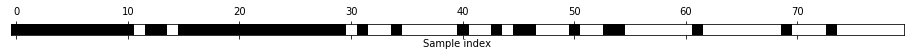

In [4]:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [5]:
from sklearn.linear_model import LogisticRegression
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951
